## Veri Setini Yükleme:

In [1]:
import nltk
from nltk.corpus import twitter_samples

In [2]:
from nltk.corpus import stopwords

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\emirr\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emirr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.tokenize import TweetTokenizer

In [6]:
from nltk.stem import PorterStemmer

In [7]:
import re
import pandas as pd

In [8]:
negative_tweets = twitter_samples.strings("negative_tweets.json")
df_neg = pd.DataFrame(negative_tweets, columns = ['text'])
df_neg['label'] = 0

In [9]:
positive_tweets = twitter_samples.strings("positive_tweets.json")
df_pos = pd.DataFrame(positive_tweets, columns = ['text'])
df_pos['label'] = 1

In [10]:
df = pd.concat([df_neg,df_pos])
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df.head(10)

,text,label
0,@llama_ajol eat and rest well :( you're too ti...,0
1,Spazzing on everything soobin dances :(,0
2,FeyTyaz Follback ya :),1
3,I kinda wanna fangirl over not an apology agai...,1
4,@Stacyyy24 Happy Birthday :),1
5,@fawadchaudhry May ALLAH save us from Pakistan...,0
6,I'm so sick aahhhh i hate this feeling :-(,0
7,@MCunleashed :D I can't sleep until I need to....,1
8,"Your happiness is your responsibilty. So, don'...",1
9,Yes the One and Only Team :) https://t.co/Q81L...,1


## Metinleri Ön İşleme:

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emirr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Metin Temizleme
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # URL'leri kaldır
    text = re.sub(r'\@\w+|\#', '', text)  # Kullanıcı adlarını ve hashtagleri kaldır
    text = re.sub(r'[^\w\s]', '', text)  # Özel karakterleri kaldır
    return text

# Metni Küçük Harfe Dönüştürme
def lowercase(text):
    return text.lower()

# Tokenization
def tokenize(text):
    return word_tokenize(text)

# Stopwords Temizleme
def remove_stopwords(tokens):
    stopwords_english = set(stopwords.words('english'))
    return [word for word in tokens if word not in stopwords_english]

# Stemming
def stem(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

# Tüm Veri Ön İşleme Adımlarını Uygula
def preprocess(text):
    text = clean_text(text)
    text = lowercase(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stem(tokens)
    return ' '.join(tokens)  # Token'ları birleştirerek temizlenmiş metni döndür

# Ön İşleme Adımlarını Tüm DataFrame'e Uygula
df['text_cleaned'] = df['text'].apply(preprocess)


In [14]:
df.head()

,text,label,text_cleaned
0,@llama_ajol eat and rest well :( you're too ti...,0,eat rest well your tire
1,Spazzing on everything soobin dances :(,0,spazz everyth soobin danc
2,FeyTyaz Follback ya :),1,feytyaz follback ya
3,I kinda wanna fangirl over not an apology agai...,1,kinda wan na fangirl apolog even tho alreadi f...
4,@Stacyyy24 Happy Birthday :),1,happi birthday


## Kelime Bulutu

In [15]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re


In [16]:
word = FreqDist(df['text_cleaned'])
wordcloud = WordCloud(width= 400, height=200,
        background_color= 'white').generate_from_frequencies(word)


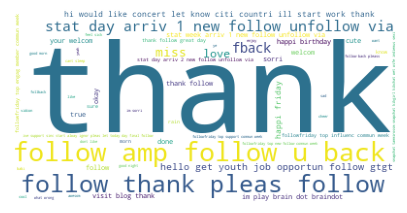

In [17]:
plt.figure(figsize=(5,3))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Öznitelik Çıkarımı:

## Tf Idf

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(df['text_cleaned'])
feature_names = vectorizer.get_feature_names_out()
print("td Idf matris: ",tfidf_matrix.shape)

td Idf matris:  (10000, 10000)


## Model Eğitimi

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tfidf_matrix,
                        df['label'], test_size = 0.2, random_state=42)

## KNN

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import warnings
warnings.simplefilter(action='ignore')


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [22]:
print("knn sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("Hassasiyet",recall_score(y_test,y_pred))
print("Kesinlik",precision_score(y_test,y_pred))

knn sonuçları
Doğruluk:  0.6045
F1:  0.39107005388760585
Hassasiyet 0.25630676084762866
Kesinlik 0.8246753246753247


## RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 150)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

In [24]:
print("Random Forest sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_clf))
print("F1: ",f1_score(y_test,y_pred_clf))
print("Hassasiyet",recall_score(y_test,y_pred_clf))
print("Kesinlik",precision_score(y_test,y_pred_clf))

Random Forest sonuçları
Doğruluk:  0.748
F1:  0.7236842105263157
Hassasiyet 0.6659939455095862
Kesinlik 0.7923169267707083


In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

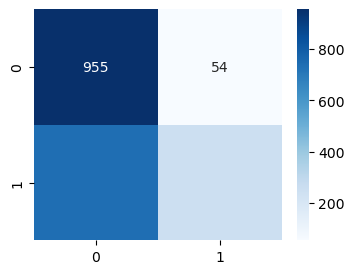

In [26]:
cm = confusion_matrix(y_test ,y_pred)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')

<Axes: >

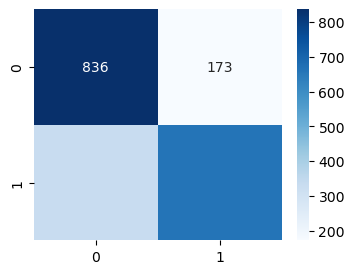

In [27]:
cm = confusion_matrix(y_test ,y_pred_clf)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')

## Logistic Regresyon

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [29]:
print("LR sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_lr))
print("F1: ",f1_score(y_test,y_pred_lr))
print("Hassasiyet",recall_score(y_test,y_pred_lr))
print("Kesinlik",precision_score(y_test,y_pred_lr))

LR sonuçları
Doğruluk:  0.754
F1:  0.74321503131524
Hassasiyet 0.7184661957618567
Kesinlik 0.7697297297297298


<Axes: >

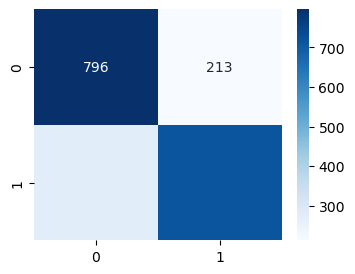

In [30]:
cm = confusion_matrix(y_test ,y_pred_lr)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')

## SVM (Support Vector Machines)

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [32]:
print("SVM sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_svm))
print("F1: ",f1_score(y_test,y_pred_svm))
print("Hassasiyet",recall_score(y_test,y_pred_svm))
print("Kesinlik",precision_score(y_test,y_pred_svm))

SVM sonuçları
Doğruluk:  0.7645
F1:  0.7550702028081123
Hassasiyet 0.7325933400605449
Kesinlik 0.778969957081545


<Axes: >

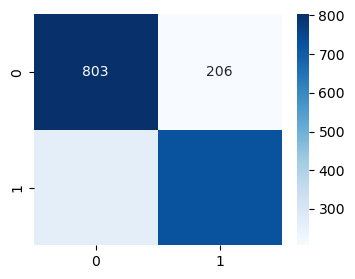

In [33]:
cm = confusion_matrix(y_test ,y_pred_svm)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues') 